<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/06_04_Improved_FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Approximating $\sin(x)$ with a Feedforward Neural Network in PyTorch


Epoch 0: Loss = 4.4802
Epoch 100: Loss = 0.2431
Epoch 200: Loss = 0.1980
Epoch 300: Loss = 0.1716
Epoch 400: Loss = 0.1528


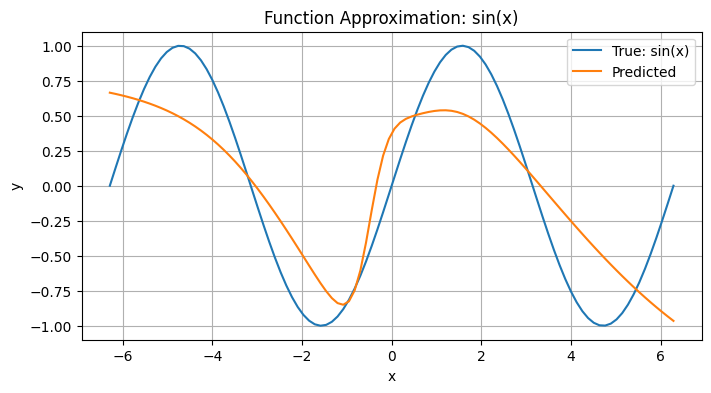

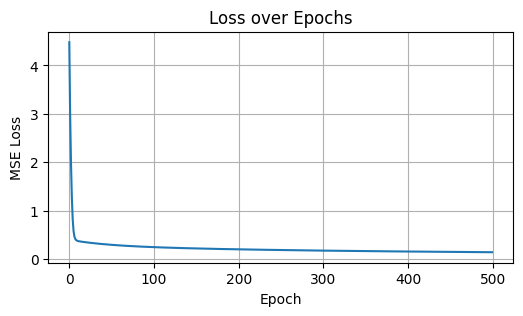

In [1]:
import torch
import matplotlib.pyplot as plt

# Set seed for reproducibility
torch.manual_seed(42)

# Generate synthetic data for y = sin(x)
x = torch.unsqueeze(torch.linspace(-2 * torch.pi, 2 * torch.pi, 100), dim=1)
y_true = torch.sin(x)

# Hyperparameters
input_size = 1
hidden_size = 10
output_size = 1
lr = 0.01
epochs = 500

# Initialize weights and biases
W1 = torch.randn((input_size, hidden_size), requires_grad=True)
b1 = torch.randn((1, hidden_size), requires_grad=True)
W2 = torch.randn((hidden_size, output_size), requires_grad=True)
b2 = torch.randn((1, output_size), requires_grad=True)

# Training loop
loss_history = []
for epoch in range(epochs):
    # Forward pass
    z1 = x @ W1 + b1
    a1 = torch.tanh(z1)
    z2 = a1 @ W2 + b2
    y_pred = z2  # no activation for regression

    # MSE loss
    loss = torch.mean((y_true - y_pred) ** 2)
    loss_history.append(loss.item())

    # Backpropagation
    loss.backward()

    # Manual gradient descent update
    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad

        # Zero the gradients
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# Plot predicted vs true
plt.figure(figsize=(8, 4))
plt.plot(x.numpy(), y_true.numpy(), label='True: sin(x)')
plt.plot(x.numpy(), y_pred.detach().numpy(), label='Predicted')
plt.title("Function Approximation: sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure(figsize=(6, 3))
plt.plot(loss_history)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


# Ways to Improve Model Accuracy

## Normalize inputs
Neural nets learn better when input is in a smaller range (e.g., -1 to 1):

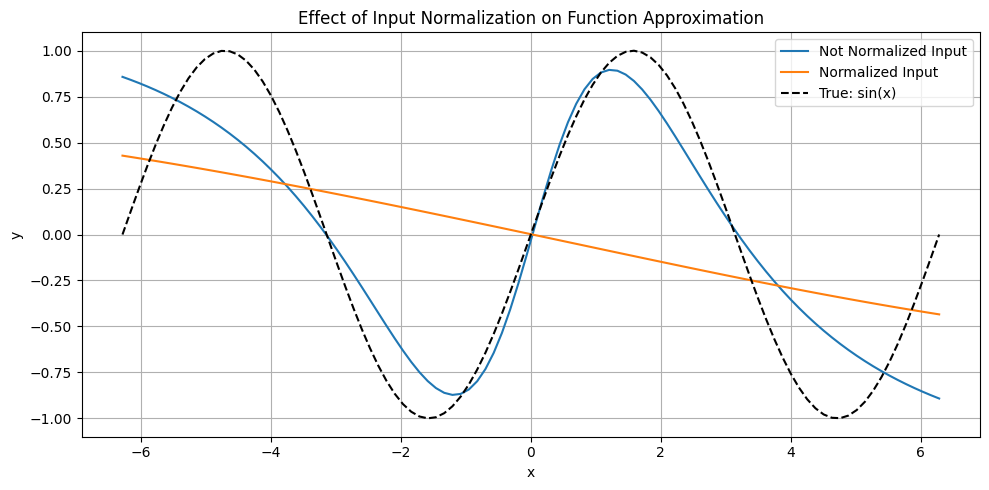

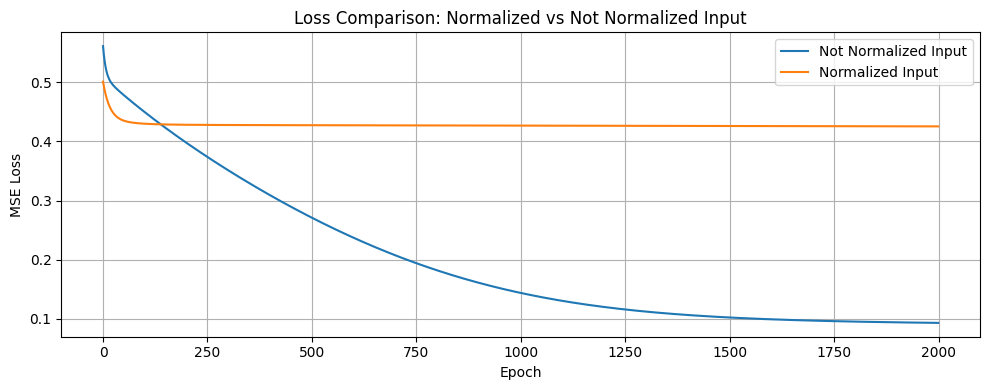

In [28]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set seed
torch.manual_seed(42)

# Generate original input and true output
x = torch.unsqueeze(torch.linspace(-2 * torch.pi, 2 * torch.pi, 100), dim=1)
y_true = torch.sin(x)

# Define hyperparameters
hidden_size = 128
epochs = 2000
lr = 0.001

results = {}

for label, input_data in [("Not Normalized", x), ("Normalized", x / (2 * torch.pi))]:
    model = nn.Sequential(
        nn.Linear(1, hidden_size),
        nn.Tanh(),
        nn.Linear(hidden_size, hidden_size),
        nn.Tanh(),
        nn.Linear(hidden_size, 1)
    )
    loss_history = []

    for epoch in range(epochs):
        y_pred = model(input_data)
        loss = torch.mean((y_true - y_pred) ** 2)
        loss_history.append(loss.item())

        loss.backward()

        with torch.no_grad():
            for param in model.parameters():
                param -= lr * param.grad
                param.grad.zero_()

    results[label] = {
        "y_pred": y_pred.detach().numpy(),
        "loss": loss_history
    }

# Plot predictions
plt.figure(figsize=(10, 5))
for label, data in results.items():
    plt.plot(x.numpy(), data["y_pred"], label=f"{label} Input")
plt.plot(x.numpy(), y_true.numpy(), 'k--', label="True: sin(x)")
plt.title("Effect of Input Normalization on Function Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot loss comparison
plt.figure(figsize=(10, 4))
for label, data in results.items():
    plt.plot(data["loss"], label=f"{label} Input")
plt.title("Loss Comparison: Normalized vs Not Normalized Input")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Increase Model Capacity
More Hidden Neurons: Try increasing from 10 → 32 or 64 neurons:
```
    hidden_size = 32
```

Add More Layers, Make it deeper:

```
    self.net = nn.Sequential(
    nn.Linear(1, 32),
    nn.Tanh(),
    nn.Linear(32, 32),
    nn.Tanh(),
    nn.Linear(32, 1))
```  


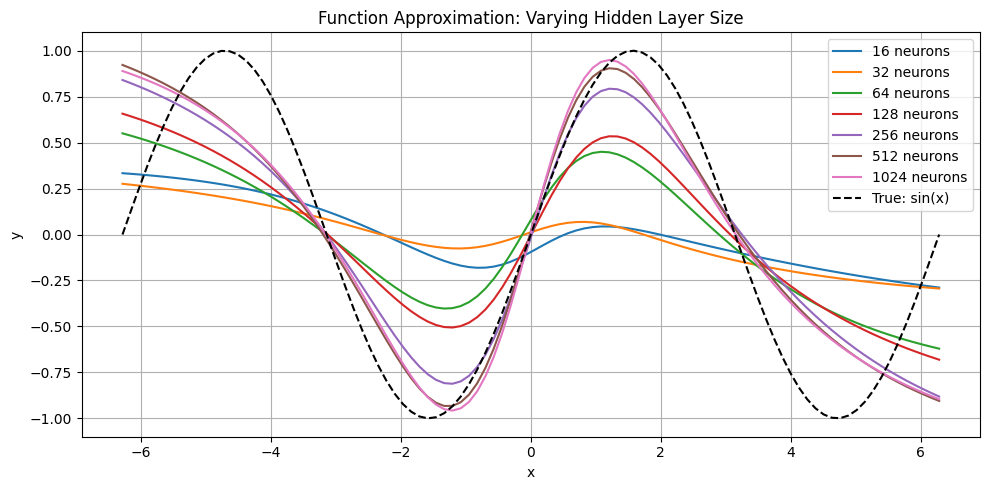

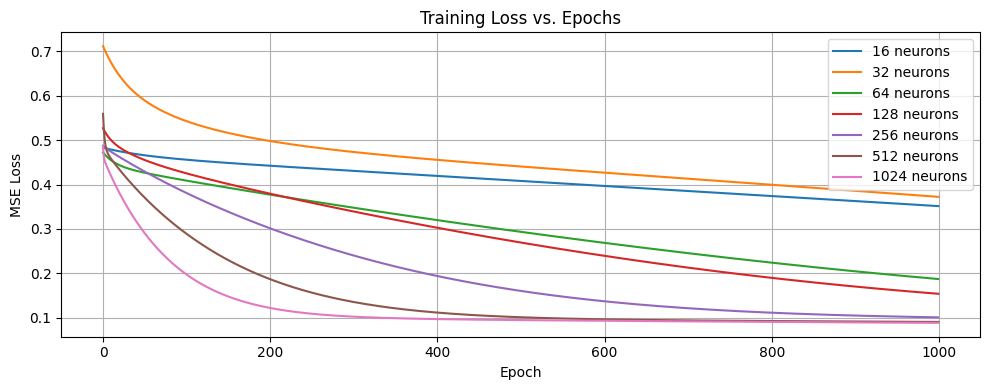

In [25]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set seed
torch.manual_seed(42)

# Generate data
x = torch.unsqueeze(torch.linspace(-2 * torch.pi, 2 * torch.pi, 100), dim=1)
y_true = torch.sin(x)

# Hyperparameters
hidden_sizes = [16, 32, 64, 128, 256, 512, 1024]
epochs = 1000
lr = 0.001
results = {}

# Compare different hidden sizes
for size in hidden_sizes:
    model = nn.Sequential(
        nn.Linear(1, size),
        nn.Tanh(),
        nn.Linear(size, size),
        nn.Tanh(),
        nn.Linear(size, 1)
    )
    loss_history = []

    for epoch in range(epochs):
        y_pred = model(x)
        loss = torch.mean((y_true - y_pred) ** 2)
        loss_history.append(loss.item())
        loss.backward()

        with torch.no_grad():
            for param in model.parameters():
                param -= lr * param.grad
                param.grad.zero_()

    results[size] = {
        "y_pred": y_pred.detach().numpy(),
        "loss": loss_history
    }

# Plot predictions
plt.figure(figsize=(10, 5))
for size, result in results.items():
    plt.plot(x.numpy(), result["y_pred"], label=f"{size} neurons")
plt.plot(x.numpy(), y_true.numpy(), 'k--', label="True: sin(x)")
plt.title("Function Approximation: Varying Hidden Layer Size")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot loss curves
plt.figure(figsize=(10, 4))
for size, result in results.items():
    plt.plot(result["loss"], label=f"{size} neurons")
plt.title("Training Loss vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Activation functions

Tanh is a good default for approximating continuous functions
Try ReLU, LeakyReLU, or ELU to compare behaviors

### Activation Functions for Regression Tasks

| Activation    | Pros                                       | Good for Regression?       |
|---------------|--------------------------------------------|-----------------------------|
| `Tanh`        | Bounded, zero-centered                     | ✅ Good                     |
| `ReLU`        | Fast, sparse gradients                     | ⚠️ Can saturate             |
| `LeakyReLU`   | Fixes dying ReLU issue                     | ✅ Better than ReLU         |
| `ELU`         | Smooth, non-zero-centered                  | ✅ Excellent                |
| `SiLU` / Swish| Smooth, non-monotonic, well-behaved        | ✅ Very Good                |


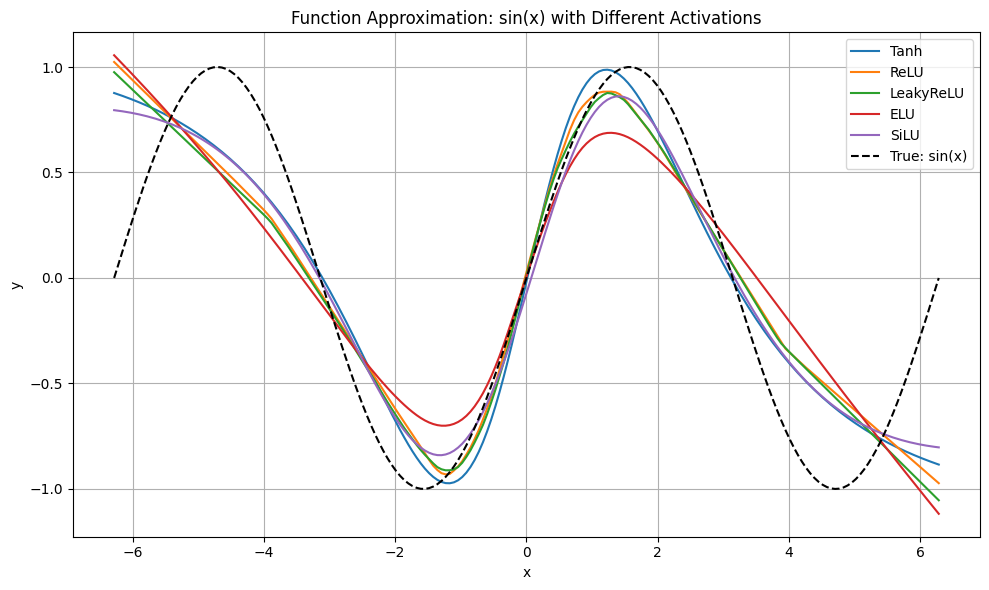

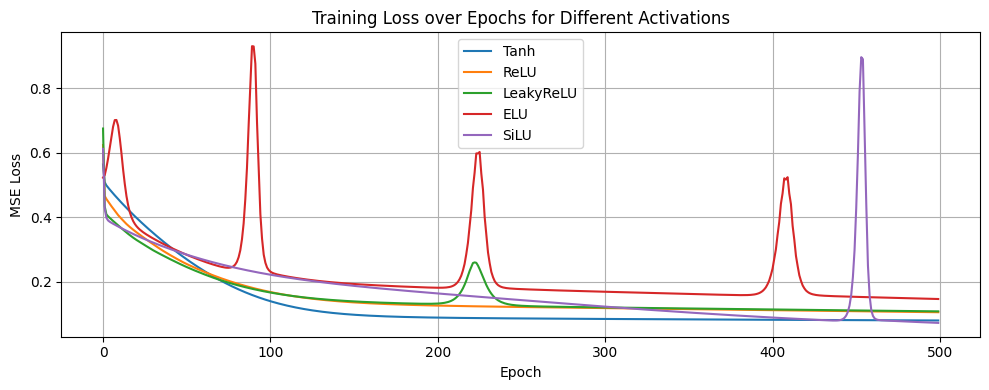

In [23]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set seed
torch.manual_seed(42)

# Generate data
x = torch.unsqueeze(torch.linspace(-2 * torch.pi, 2 * torch.pi, 200), dim=1)
y_true = torch.sin(x)

# Common hyperparameters
hidden_size = 128
epochs = 500
lr = 0.01

# Activation function names and classes
activations = {
    "Tanh": nn.Tanh,
    "ReLU": nn.ReLU,
    "LeakyReLU": nn.LeakyReLU,
    "ELU": nn.ELU,
    "SiLU": nn.SiLU
}

# Store final predictions and loss curves
results = {}

for name, Act in activations.items():
    # Create model
    model = nn.Sequential(
        nn.Linear(1, hidden_size),
        Act(),
        nn.Linear(hidden_size, hidden_size),
        Act(),
        nn.Linear(hidden_size, 1)
    )

    loss_history = []

    # Training loop
    for epoch in range(epochs):
        y_pred = model(x)
        loss = torch.mean((y_true - y_pred) ** 2)
        loss_history.append(loss.item())

        loss.backward()

        with torch.no_grad():
            for param in model.parameters():
                param -= lr * param.grad
                param.grad.zero_()

    results[name] = {
        "y_pred": y_pred.detach().numpy(),
        "loss": loss_history
    }

# Plot predictions
plt.figure(figsize=(10, 6))
for name, data in results.items():
    plt.plot(x.numpy(), data["y_pred"], label=name)
plt.plot(x.numpy(), y_true.numpy(), label="True: sin(x)", color="black", linestyle="--")
plt.title("Function Approximation: sin(x) with Different Activations")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot loss curves
plt.figure(figsize=(10, 4))
for name, data in results.items():
    plt.plot(data["loss"], label=name)
plt.title("Training Loss over Epochs for Different Activations")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Train longer

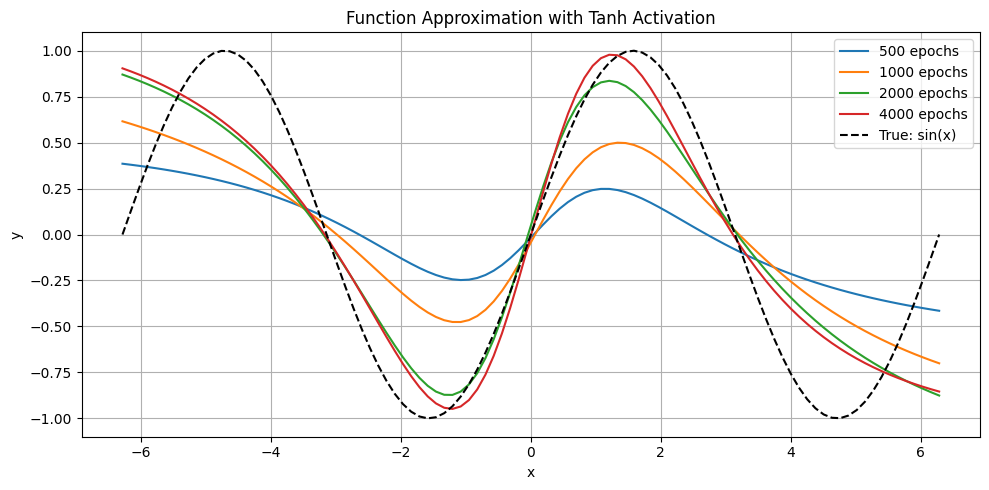

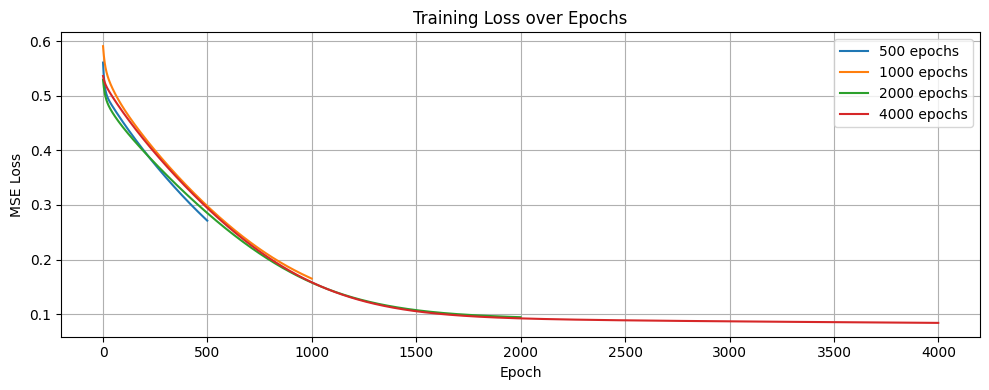

In [22]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set seed
torch.manual_seed(42)

# Generate data
x = torch.unsqueeze(torch.linspace(-2 * torch.pi, 2 * torch.pi, 100), dim=1)
y_true = torch.sin(x)

# Shared hyperparameters
hidden_size = 128
lr = 0.001
epoch_settings = [500, 1000, 2000, 4000]
results = {}

for epochs in epoch_settings:
    model = nn.Sequential(
        nn.Linear(1, hidden_size),
        nn.Tanh(),
        nn.Linear(hidden_size, hidden_size),
        nn.Tanh(),
        nn.Linear(hidden_size, 1)
    )
    loss_history = []

    for epoch in range(epochs):
        y_pred = model(x)
        loss = torch.mean((y_true - y_pred) ** 2)
        loss_history.append(loss.item())
        loss.backward()

        with torch.no_grad():
            for param in model.parameters():
                param -= lr * param.grad
                param.grad.zero_()

    results[epochs] = {
        "y_pred": y_pred.detach().numpy(),
        "loss": loss_history
    }

# Plot predictions
plt.figure(figsize=(10, 5))
for epochs, result in results.items():
    plt.plot(x.numpy(), result["y_pred"], label=f"{epochs} epochs")
plt.plot(x.numpy(), y_true.numpy(), 'k--', label="True: sin(x)")
plt.title("Function Approximation with Tanh Activation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot loss curves
plt.figure(figsize=(10, 4))
for epochs, result in results.items():
    plt.plot(result["loss"], label=f"{epochs} epochs")
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Optimizer

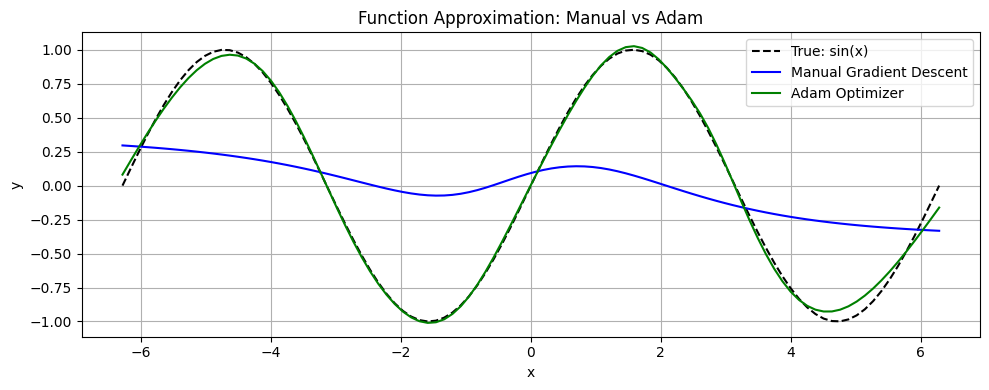

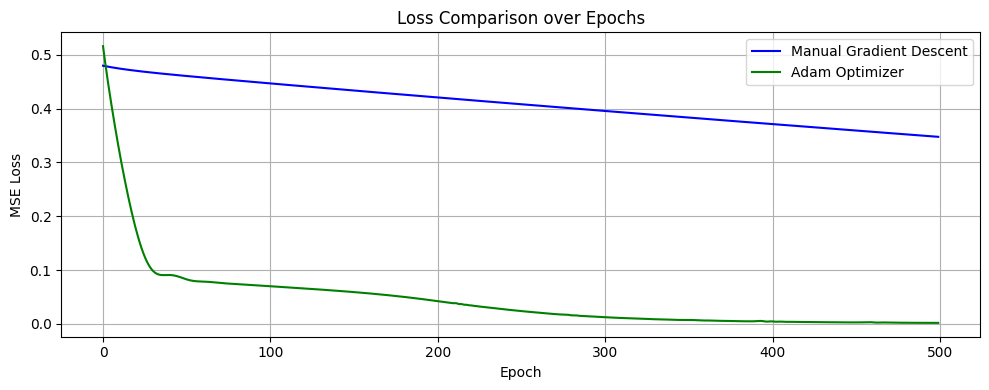

In [33]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set seed
torch.manual_seed(42)

# Generate input and true output
x = torch.unsqueeze(torch.linspace(-2 * torch.pi, 2 * torch.pi, 100), dim=1)
y_true = torch.sin(x)

# Config
hidden_size = 64
epochs = 500
lr = 0.001

def train_model(use_optimizer=True):
    model = nn.Sequential(
        nn.Linear(1, hidden_size),
        nn.Tanh(),
        nn.Linear(hidden_size, hidden_size),
        nn.Tanh(),
        nn.Linear(hidden_size, 1)
    )

    if use_optimizer:
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    loss_history = []

    for epoch in range(epochs):
        y_pred = model(x)
        loss = torch.mean((y_true - y_pred) ** 2)
        loss_history.append(loss.item())

        loss.backward()

        if use_optimizer:
            optimizer.step()
            optimizer.zero_grad()
        else:
            with torch.no_grad():
                for param in model.parameters():
                    param -= lr * param.grad
                    param.grad.zero_()

    return model, loss_history

# Train both models
manual_model, manual_loss = train_model(use_optimizer=False)
adam_model, adam_loss = train_model(use_optimizer=True)

# Plot predictions
plt.figure(figsize=(10, 4))
plt.plot(x.numpy(), y_true.numpy(), label="True: sin(x)", color="black", linestyle="--")
plt.plot(x.numpy(), manual_model(x).detach().numpy(), label="Manual Gradient Descent", color="blue")
plt.plot(x.numpy(), adam_model(x).detach().numpy(), label="Adam Optimizer", color="green")
plt.title("Function Approximation: Manual vs Adam")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot training loss
plt.figure(figsize=(10, 4))
plt.plot(manual_loss, label="Manual Gradient Descent", color="blue")
plt.plot(adam_loss, label="Adam Optimizer", color="green")
plt.title("Loss Comparison over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## More training data

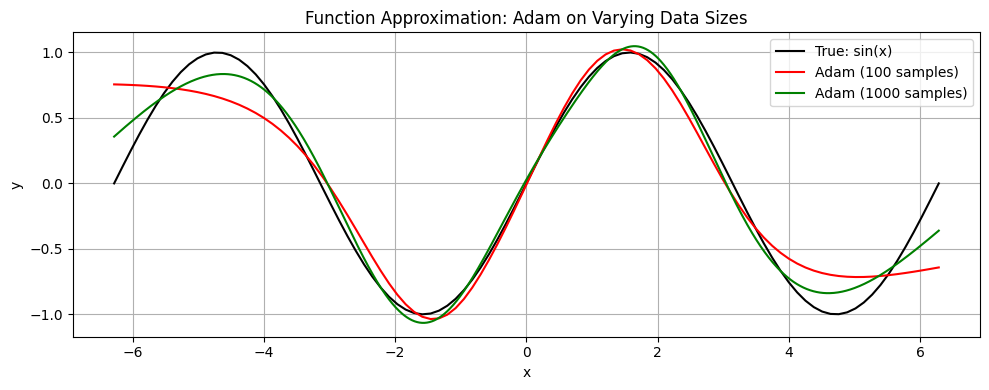

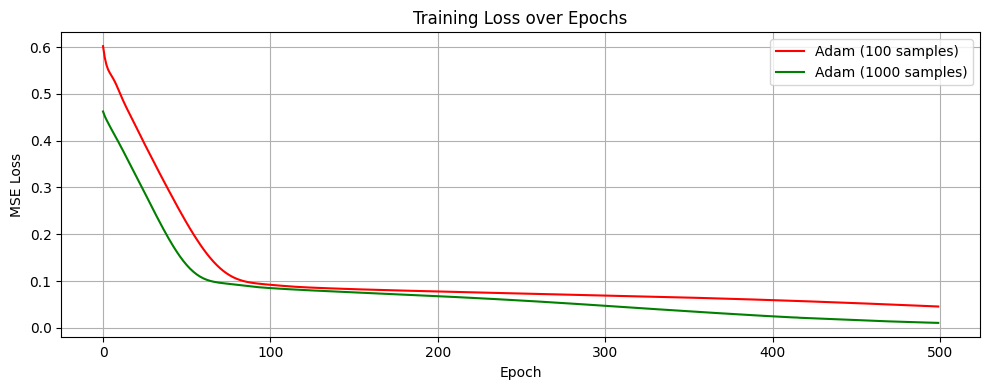

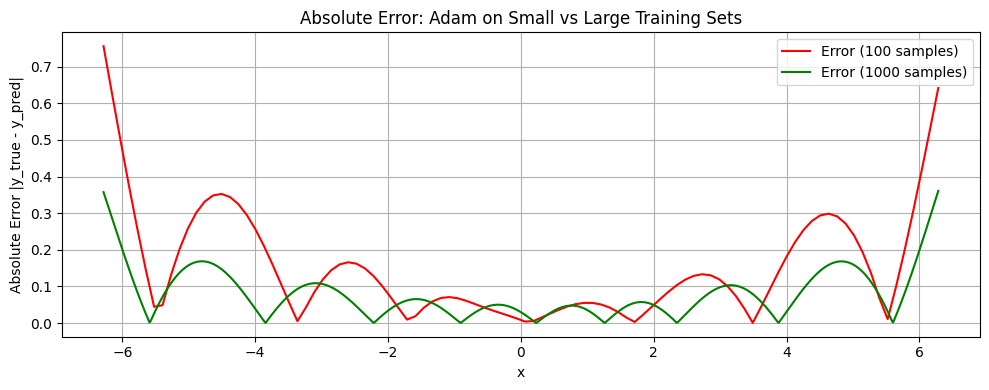

In [47]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set seed
torch.manual_seed(42)

# True function
def true_function(x):
    return torch.sin(x)

# Shared config
hidden_size = 32
epochs = 500
lr = 0.001

def train_adam_model(x_raw):
    y_true = true_function(x_raw)

    model = nn.Sequential(
        nn.Linear(1, hidden_size),
        nn.Tanh(),
        nn.Linear(hidden_size, hidden_size),
        nn.Tanh(),
        nn.Linear(hidden_size, 1)
    )

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_history = []

    for epoch in range(epochs):
        y_pred = model(x_raw)
        loss = torch.mean((y_true - y_pred) ** 2)
        loss_history.append(loss.item())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    y_pred = model(x_raw).detach()
    abs_error = torch.abs(y_true - y_pred)

    return model, loss_history, y_true, y_pred, abs_error

# Datasets
x_small = torch.unsqueeze(torch.linspace(-2 * torch.pi, 2 * torch.pi, 100), dim=1)
x_large = torch.unsqueeze(torch.linspace(-2 * torch.pi, 2 * torch.pi, 1000), dim=1)

# Train both
model_small, loss_small, y_small, y_pred_small, err_small = train_adam_model(x_small)
model_large, loss_large, y_large, y_pred_large, err_large = train_adam_model(x_large)

# 1. Plot predictions
plt.figure(figsize=(10, 4))
plt.plot(x_small.numpy(), true_function(x_small).numpy(), 'k', label="True: sin(x)")
plt.plot(x_small.numpy(), y_pred_small.numpy(), color="red", label="Adam (100 samples)")
plt.plot(x_large.numpy(), y_pred_large.numpy(), color="green", label="Adam (1000 samples)")
plt.title("Function Approximation: Adam on Varying Data Sizes")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Plot loss curves
plt.figure(figsize=(10, 4))
plt.plot(loss_small, label="Adam (100 samples)", color="red")
plt.plot(loss_large, label="Adam (1000 samples)", color="green")
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Plot absolute error
plt.figure(figsize=(10, 4))
plt.plot(x_small.numpy(), err_small.numpy(), label="Error (100 samples)", color="red")
plt.plot(x_large.numpy(), err_large.numpy(), label="Error (1000 samples)", color="green")
plt.title("Absolute Error: Adam on Small vs Large Training Sets")
plt.xlabel("x")
plt.ylabel("Absolute Error |y_true - y_pred|")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Validation set

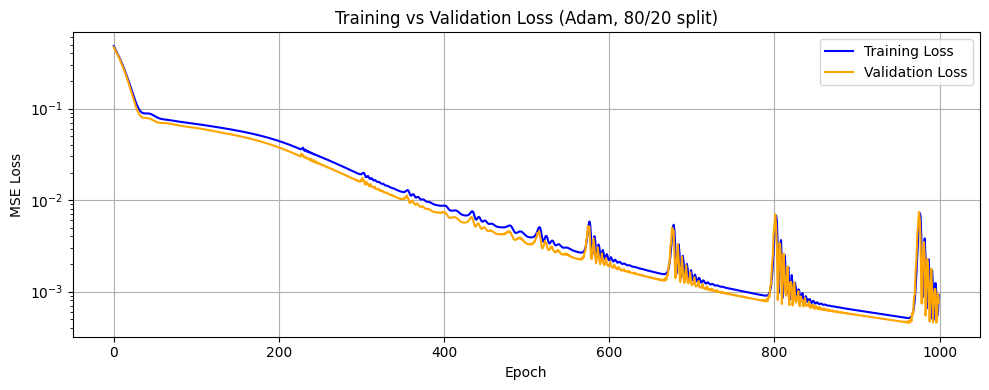

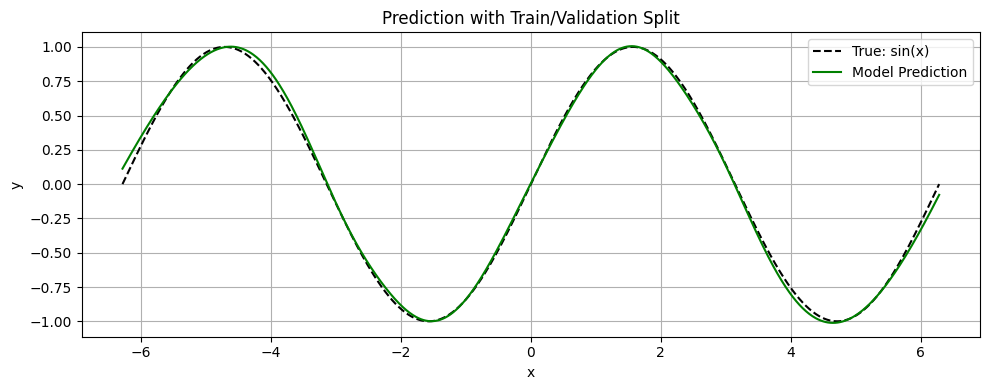

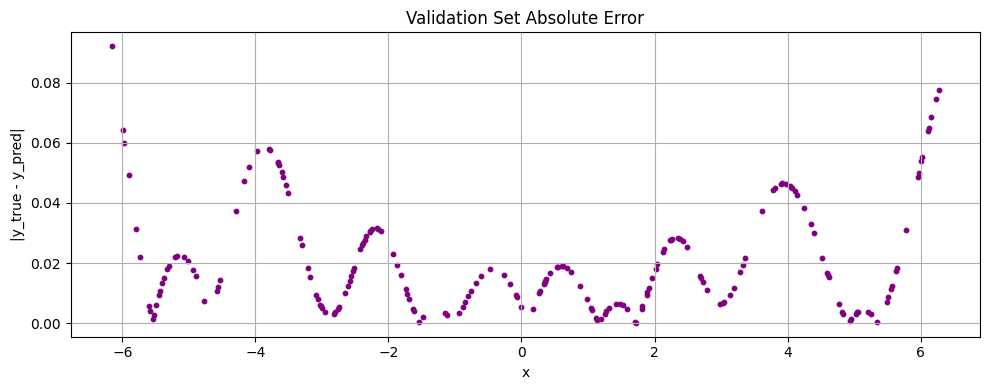

In [51]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set seed
torch.manual_seed(42)

# True function
def true_function(x):
    return torch.sin(x)

# Config
hidden_size = 64
epochs = 1000
lr = 0.001

# Generate full dataset
x_full = torch.unsqueeze(torch.linspace(-2 * torch.pi, 2 * torch.pi, 1000), dim=1)
y_full = true_function(x_full)

# Split into train and validation sets
x_train_np, x_val_np, y_train_np, y_val_np = train_test_split(
    x_full.numpy(), y_full.numpy(), test_size=0.2, random_state=42
)
x_train = torch.tensor(x_train_np, dtype=torch.float32)
x_val = torch.tensor(x_val_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np, dtype=torch.float32)
y_val = torch.tensor(y_val_np, dtype=torch.float32)

# Define and train model
model = nn.Sequential(
    nn.Linear(1, hidden_size),
    nn.Tanh(),
    nn.Linear(hidden_size, hidden_size),
    nn.Tanh(),
    nn.Linear(hidden_size, 1)
)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
train_loss_history = []
val_loss_history = []

for epoch in range(epochs):
    model.train()
    y_pred_train = model(x_train)
    loss_train = torch.mean((y_train - y_pred_train) ** 2)
    train_loss_history.append(loss_train.item())

    loss_train.backward()
    optimizer.step()
    optimizer.zero_grad()

    # Validation
    model.eval()
    with torch.no_grad():
        y_pred_val = model(x_val)
        loss_val = torch.mean((y_val - y_pred_val) ** 2)
        val_loss_history.append(loss_val.item())

# Plot training and validation loss
plt.figure(figsize=(10, 4))
plt.semilogy(train_loss_history, label="Training Loss", color="blue")
plt.semilogy(val_loss_history, label="Validation Loss", color="orange")
plt.title("Training vs Validation Loss (Adam, 80/20 split)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot predictions on full input
with torch.no_grad():
    y_pred_full = model(x_full)

plt.figure(figsize=(10, 4))
plt.plot(x_full.numpy(), y_full.numpy(), 'k--', label="True: sin(x)")
plt.plot(x_full.numpy(), y_pred_full.numpy(), label="Model Prediction", color="green")
plt.title("Prediction with Train/Validation Split")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot validation absolute error
val_abs_error = torch.abs(y_val - y_pred_val)

plt.figure(figsize=(10, 4))
plt.scatter(x_val.numpy(), val_abs_error.numpy(), color="purple", s=10)
plt.title("Validation Set Absolute Error")
plt.xlabel("x")
plt.ylabel("|y_true - y_pred|")
plt.grid(True)
plt.tight_layout()
plt.show()


## Final Comparison

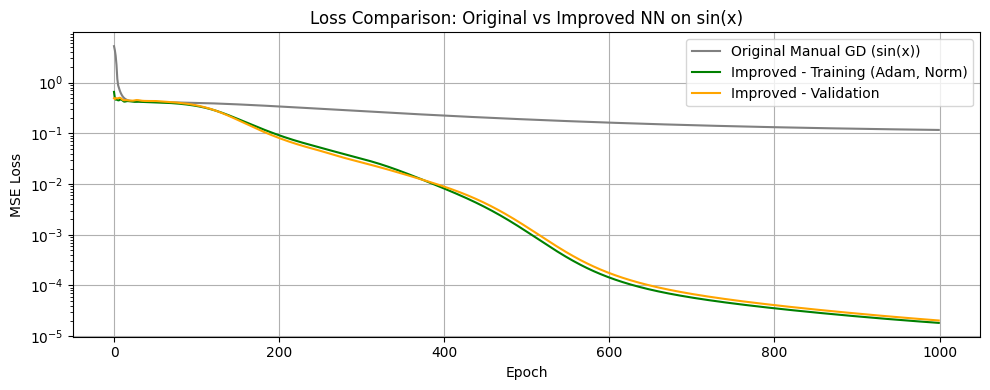

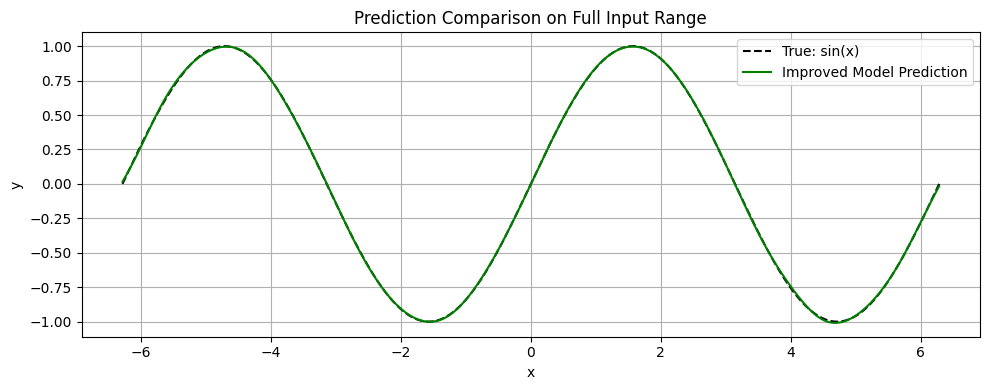

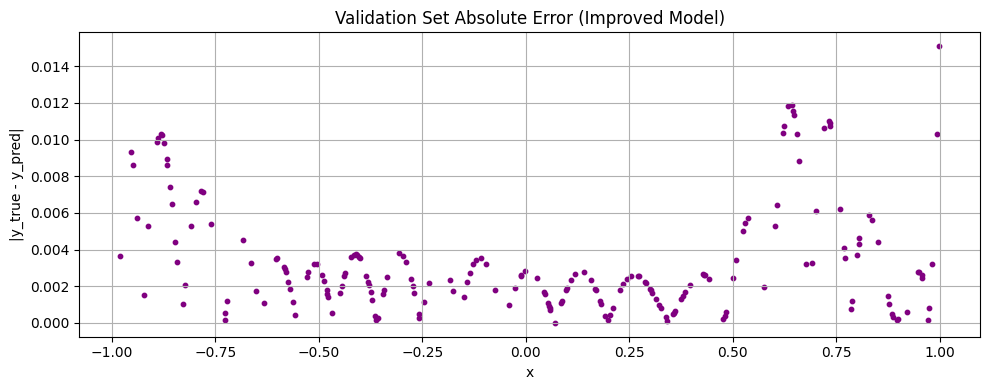

In [49]:
# Comparison of Original Manual NN vs Improved NN with Enhancements

# ----------------------
# 🔹 Original (Manual GD, Simple NN, sin(x) Function, No Normalization)
# ----------------------
import torch
import matplotlib.pyplot as plt

# Set seed
torch.manual_seed(42)

# Generate original sin(x) dataset (100 points)
x_orig = torch.unsqueeze(torch.linspace(-2 * torch.pi, 2 * torch.pi, 100), dim=1)
y_orig = torch.sin(x_orig)

# Define a simple 1-layer network manually
W1 = torch.randn((1, 3), requires_grad=True)
b1 = torch.randn((1, 3), requires_grad=True)
W2 = torch.randn((3, 1), requires_grad=True)
b2 = torch.randn((1, 1), requires_grad=True)

# Training loop (manual GD)
lr = 0.01
epochs = 1000
losses_orig = []

for epoch in range(epochs):
    z1 = x_orig @ W1 + b1
    a1 = torch.tanh(z1)
    z2 = a1 @ W2 + b2
    y_pred = z2  # regression output
    loss = torch.mean((y_orig - y_pred) ** 2)
    losses_orig.append(loss.item())
    loss.backward()
    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad
        W1.grad.zero_(); b1.grad.zero_(); W2.grad.zero_(); b2.grad.zero_()

# ----------------------
# 🔹 Improved Version (Adam, Normalized Input, Deeper, Validation, etc.)
# ----------------------
import torch.nn as nn
from sklearn.model_selection import train_test_split

# Generate data for sin(x)
x_full = torch.unsqueeze(torch.linspace(-2 * torch.pi, 2 * torch.pi, 1000), dim=1)
y_full = torch.sin(x_full)
x_norm = x_full / (2 * torch.pi)  # Normalize to [-1, 1]

# Train/validation split
x_train_np, x_val_np, y_train_np, y_val_np = train_test_split(
    x_norm.numpy(), y_full.numpy(), test_size=0.2, random_state=42)

x_train = torch.tensor(x_train_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np, dtype=torch.float32)
x_val = torch.tensor(x_val_np, dtype=torch.float32)
y_val = torch.tensor(y_val_np, dtype=torch.float32)

# Improved model definition
model = nn.Sequential(
    nn.Linear(1, 128),
    nn.Tanh(),
    nn.Linear(128, 128),
    nn.Tanh(),
    nn.Linear(128, 1)
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
epochs = 1000
train_loss, val_loss = [], []

# Training loop
for epoch in range(epochs):
    model.train()
    y_pred_train = model(x_train)
    loss = loss_fn(y_pred_train, y_train)
    train_loss.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred_val = model(x_val)
        val_loss.append(loss_fn(y_pred_val, y_val).item())

# Plot loss comparison
plt.figure(figsize=(10, 4))
plt.semilogy(losses_orig, label="Original Manual GD (sin(x))", color="gray")
plt.semilogy(train_loss, label="Improved - Training (Adam, Norm)", color="green")
plt.semilogy(val_loss, label="Improved - Validation", color="orange")
plt.title("Loss Comparison: Original vs Improved NN on sin(x)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot predictions on full input
x_full_norm = x_full / (2 * torch.pi)
with torch.no_grad():
    y_pred_full = model(x_full_norm)

plt.figure(figsize=(10, 4))
plt.plot(x_full.numpy(), y_full.numpy(), label="True: sin(x)", linestyle="--", color="black")
plt.plot(x_full.numpy(), y_pred_full.numpy(), label="Improved Model Prediction", color="green")
plt.title("Prediction Comparison on Full Input Range")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot validation absolute error
val_abs_error = torch.abs(y_val - y_pred_val)

plt.figure(figsize=(10, 4))
plt.scatter(x_val.numpy(), val_abs_error.numpy(), color="purple", s=10)
plt.title("Validation Set Absolute Error (Improved Model)")
plt.xlabel("x")
plt.ylabel("|y_true - y_pred|")
plt.grid(True)
plt.tight_layout()
plt.show()